In [1]:
import pickle
from matplotlib import pyplot as plt
from forecasting.model_builders import build_conv_model
from forecasting.data_fetcher import DataFetcher
from forecasting.forecaster import Forecaster
from fsite_data import *

In [2]:
refetch_data = False  
if refetch_data:
    illinois_kerby = DataFetcher("14377100", illinois_kerby_weather_sources  )
    pickle_out = open("fsites/illinois_kerby.pickle", "wb")
    pickle.dump(illinois_kerby, pickle_out)
    pickle_out.close()
else:
    pickle_in = open("fsites/illinois_kerby.pickle", "rb")
    illinois_kerby = pickle.load(pickle_in)

In [3]:
frcstr = Forecaster(illinois_kerby, build_conv_model)

Building dataset
Adding lag
Splitting X, y
Scaling X, y
233498
233493
233498
233493
Adding lag
Splitting X, y
Scaling X, y
(5, 8, 1)


In [4]:
retrain = False
if retrain:
    frcstr.fit(epochs=50)
else: 
    frcstr.load_trained()

Loading trained model


In [5]:
model = frcstr.model
X_test = frcstr.dataset.X_test_shaped
y_test = frcstr.dataset.y_test

In [6]:
y_pred = model.predict(X_test)
y_pred = frcstr.dataset.target_scaler.inverse_transform(y_pred)
y_true = frcstr.dataset.target_scaler.inverse_transform(y_test)

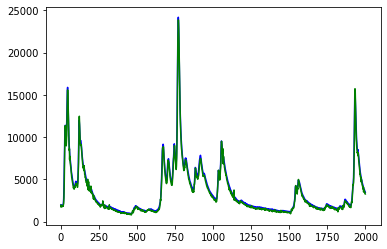

In [7]:
plt.plot(y_true[5000:7000], color='blue')
plt.plot(y_pred[5000:7000], color="green")
plt.show()

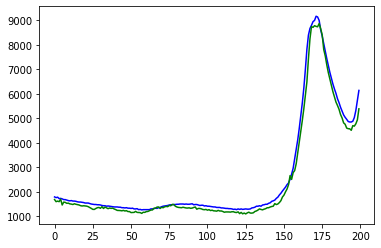

In [8]:
plt.plot(y_true[5500:5700], color='blue')
plt.plot(y_pred[5500:5700], color="green")
plt.show()